In [6]:
"""Using TensorFlow primitives perform the following steps:

allocate random normal variables for weight and bias representation of a multi-layer perceptron (MLP) with n_input size,
two hidden layers with n_hidden_1 and n_hidden_2 neurons respectively and n_output size.

define a function which takes a tensor as input and returns the MLP prediction. 
Use the sigmoid function as activation function for all nodes in the network except for the output layer, which should be linear.

Test the model prediction for 10 values in x linearly spaced from [-1,1] with n_input=1,
n_hidden_1=5, n_hidden_2=2, n_output=1."""
import tensorflow as tf
import numpy as np
#1

n_input = 1       # Numero di neuroni nello strato di input
n_hidden_1 = 5     # Numero di neuroni nel primo hidden layer
n_hidden_2 = 2     # Numero di neuroni nel secondo hidden layer
n_output = 1        # Numero di neuroni nell'output layer


"""Nel Multilayer Perceptron (MLP), ogni strato è formato da neuroni, e i pesi rappresentano le connessioni tra i neuroni di strati adiacenti.

🔹 Regola generale per i pesi in un layer
Per uno strato con 𝑛inputneuroni collegato a uno strato con 𝑛output
neuroni, i pesi hanno la forma:

        𝑊shape=(𝑛input,𝑛output)

Ogni colonna rappresenta un neurone del livello successivo.
Ogni riga rappresenta un neurone del livello precedente.
I pesi trasferiscono l'informazione tra i layer."""

#pesi:
h1=tf.Variable(tf.random.normal([n_input,n_hidden_1])) #peso tra i passi input-1
h2=tf.Variable(tf.random.normal([n_hidden_1,n_hidden_2]))# tra 1-2
hf=tf.Variable(tf.random.normal([n_hidden_2,n_output])) #2-output
"""
                Il bias è un valore indipendente dagli input, quindi:

Per uno strato con n neuroni, il bias ha dimensione (𝑛 neuroni,)."""
b1=tf.Variable(tf.random.normal([n_hidden_1]))
b2=tf.Variable(tf.random.normal([n_hidden_2]))
bf=tf.Variable(tf.random.normal([n_output]))

#2
def sigmoid(z):
    return 1/(1+tf.exp(-z))
def MLP_prediction(x):
    #prende l'input e applica la forward propagation
    #nei primi due layer uso la sigmoid come funzione di attivazione
#primo step: calcolo z= somme(xiwi)+b (somma pesata sui pesi), la prima parte(prodotto tre tensori) la fa la funzione matmul
    z1=tf.matmul(x,h1)+b1
    a1=sigmoid(z1)
    z2=tf.matmul(a1,h2)+b2
    a2=sigmoid(z2)
#output layer è richiesto con funzone di attivazione lineare, quindi con af=output=f(z)=z
    zf=tf.matmul(a2,hf)+bf
    output=zf
    return output

x_test = tf.reshape(tf.linspace(-1.0, 1.0, n_input), [1, n_input])

y1=MLP_prediction(x_test)
print(o)


NameError: name 'o' is not defined

In [ ]:
#Translate the previous exercise with TensorFlow/Keras's sequential model.


"""Il modello Sequential è il tipo più semplice di rete neurale in TensorFlow/Keras,
dove gli strati (layers) sono empilati in ordine sequenziale (uno dopo l'altro)."""

#model=tf.keras.sequential() #creo il modello


"""Dense è il layer completamente connesso (fully connected) usato in reti neurali artificiali
(MLP, CNN, etc.).
In un layer Dense, ogni neurone è connesso a tutti i neuroni dello strato precedente.

keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform')

units → Numero di neuroni nel layer.
activation → Funzione di attivazione (relu, sigmoid, softmax, etc.).
use_bias → Se usare un bias (default: True).
kernel_initializer → Metodo di inizializzazione dei pesi. gauss= tf.keras.inizializers.RandomNormal())

"""
#aggiungo i layer
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(n_hidden_1, activation="sigmoid", input_dim=1))#il primo layer, quello di imput, prende dei valori scalari, per quello imputdim=1
model.add(tf.keras.layers.Dense(n_hidden_2, activation="sigmoid"))
model.add(tf.keras.layers.Dense(n_output, activation="linear"))

model.summary()

model.set_weights([h1, b1,
                  h2, b2,
                  hf, bf])
y2=model.predict(x_test)

if not np.allclose(y1, y2):
    raise ValueError("results do not match")


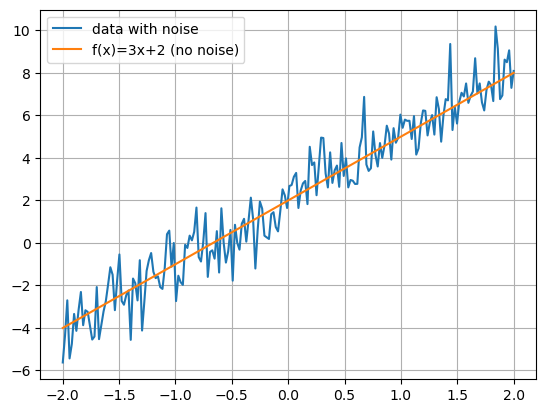

In [12]:
#Exercise 3 - Manual training with functional API
import matplotlib
import matplotlib.pyplot as plt
def f(x):
    return 3*x+2

def generate_data():
    x=tf.linspace(-2,2,200) #200 numeri linspace tra -2 e 2
    x = tf.cast(x, tf.float32) #setta la precisione a float32bit
    #aggiungo rumore gaussiano
    noise=tf.random.normal(shape=x.shape) #genera numeri random gaussiani con dimensione=dimensione di x(per generalizzare)
#funzione rumorosa, per poi farci girare il modello che la fitta
    y=f(x)+noise
    return x,y

x,y=generate_data()
plt.plot(x,y, label="data with noise")
xteo=tf.linspace(-2,2,200)
yteo=f(xteo)
plt.plot(xteo,yteo, label="f(x)=3x+2 (no noise)")
plt.legend()
plt.grid(True)
plt.show()

Initial loss: 11.1510


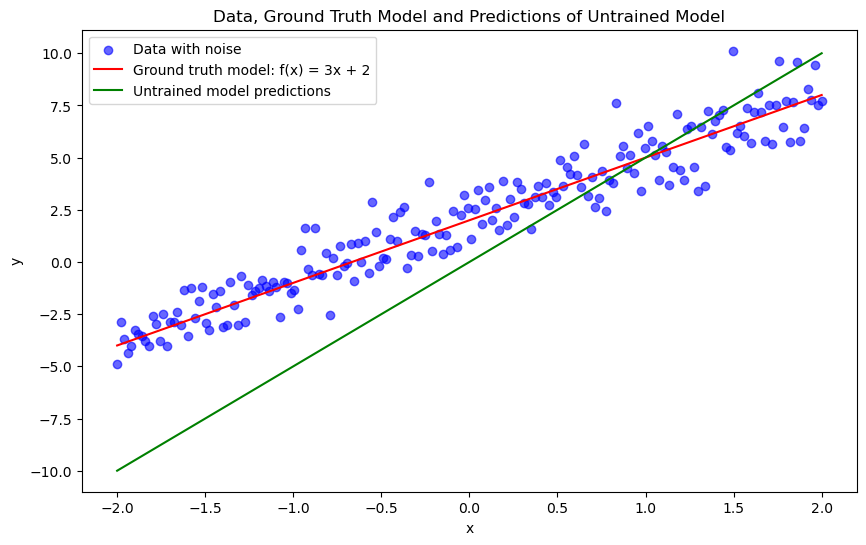

In [34]:
"""Linear fit

Define a custom model using tf.Module inheritance which returns the functional form w * x + b where w and b are tensor variables initialized with random values.

Define a loss function matching the mean squared error.

Plot data, ground truth model, predictions and loss function for the untrained model."""


#custom model "template", che poi reistanzio con ereditareta tramite super()
"""nota: la classe che sto definendo prende un argomento tf.Module, che è a sua volta
una classe in tensorflow. Questa è l'ereditarietà in python. Facendo cosi la mia classe
sta ereditando tutti i metodi e attributi presenti nella superclasse tf.module"""
class custom_model(tf.Module):
    def __init__(self,**kwargs): #kwargs permette di introdurre altri input al momento della chiamata dell'istanza della classe
        super().__init__(**kwargs)# se passo altri argomnti kwargs, richiama il costruttore principale passandoglieli come argomenti
    #inizializzo pesi e bias random
        self.w=tf.Variable(5.0)
        self.b=tf.Variable(0.0)

    def __call__(self, x): #metodo che fa lo step, lo chiamo con module()
        return self.w*x+self.b

#ora con keras

class custom_keras_model(tf.keras.Model):
    def __init__(self,**kwargs):
        super().__init__(**kwargs)
        self.w=tf.Variable(5.0)
        self.b=tf.Variable(0.0)
    def __call__(self, x): #nota polimorfismo in python:il nome della funzione è lo stesso, ma in generale l'output dipende dalla classe che lo chiama, non serve l override com in c++
        return self.w*x+self.b


def loss_function(target_y, predicted_y):
#MSE
    return tf.reduce_mean(tf.square(target_y-predicted_y)) #reduce mean calcola la media lungo un asse di un tensore, se non specifichi quale, fa la media di tutti gli elementi


#plotto
def main():
    

    # Aggiungo rumore ai dati
    x,y_noisy = generate_data()
    y_true = 3.0 * x + 2.0  # La verità di base f(x) = 3x + 2
    # Creo il modello personalizzato
    model = custom_model()

    # Calcolo la previsione per il modello non addestrato
    y_pred = model(x)

    # Calcolo la perdita iniziale del modello non addestrato
    initial_loss = loss_function(y_noisy, y_pred)
    print(f"Initial loss: {initial_loss.numpy():.4f}")

    # Visualizzo i dati, il modello di verità di base e le previsioni del modello non addestrato
    plt.figure(figsize=(10, 6))

    # Traccia i dati con rumore
    plt.scatter(x, y_noisy, color='blue', label='Data with noise', alpha=0.6)

    # Traccia la verità di base (f(x) = 3x + 2)
    plt.plot(x, y_true, color='red', label='Ground truth model: f(x) = 3x + 2')

    # Traccia le previsioni del modello non addestrato
    plt.plot(x, y_pred, color='green', label='Untrained model predictions')

    plt.title("Data, Ground Truth Model and Predictions of Untrained Model")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()

    plt.show()

# Esegui la funzione main
main()
        

Initial loss: 10.4317
current loss=6.169982433319092
W = 4.49, b = 0.41, loss=6.16998
current loss=3.9991893768310547
W = 4.11, b = 0.73, loss=3.99919
current loss=2.7386176586151123
W = 3.84, b = 1.00, loss=2.73862
current loss=2.000576972961426
W = 3.64, b = 1.20, loss=2.00058
current loss=1.564921259880066
W = 3.49, b = 1.37, loss=1.56492
current loss=1.3056883811950684
W = 3.39, b = 1.50, loss=1.30569
current loss=1.1502360105514526
W = 3.31, b = 1.61, loss=1.15024
current loss=1.0563287734985352
W = 3.25, b = 1.70, loss=1.05633
current loss=0.9992082118988037
W = 3.21, b = 1.77, loss=0.99921
current loss=0.9642420411109924
W = 3.18, b = 1.82, loss=0.96424


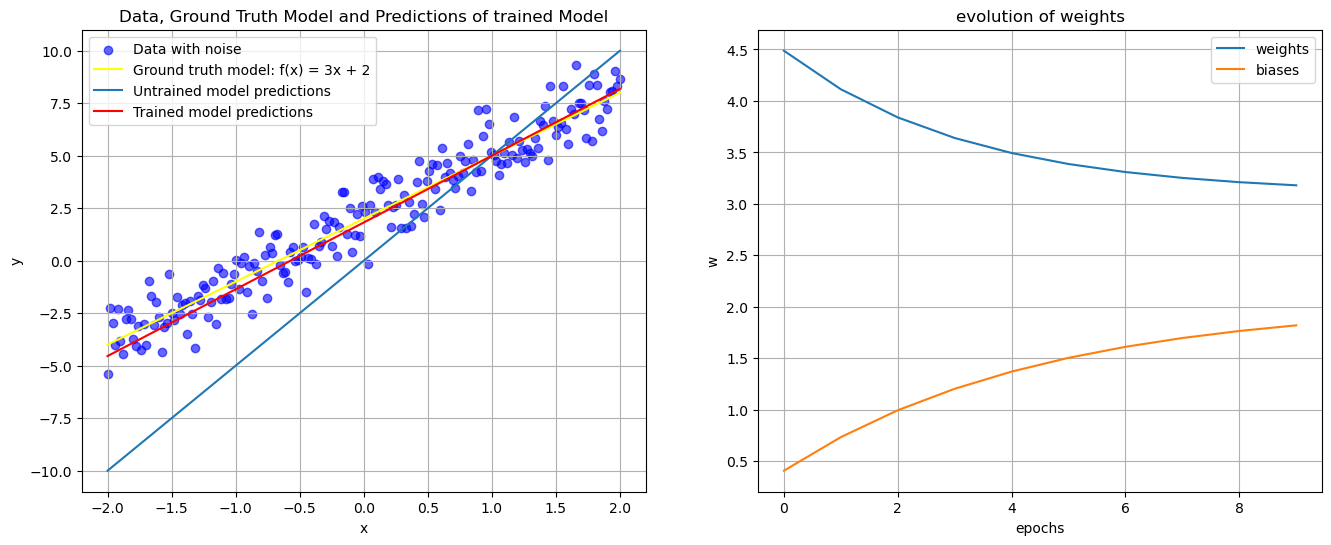

In [69]:
"""Training loop

Define a train function which computes the loss function gradient and performs a full batch SGD (manually).

Define a training_loop function which takes performs 10 epochs, prints the loss function at each iteration to screen and stores the model weights."""


# Implementazione di Stochastic Gradient Descent (SGD)
# L'idea è aggiornare i parametri del modello usando il gradiente calcolato su un singolo esempio
# Formula: θ := θ - η * grad(J(θ; xᶦ, yᶦ))
# dove:
# - θ sono i parametri (pesi e bias) del modello
# - η è il learning rate (iperparametro scelto a mano, es: 0.01)
# - grad(J) è il gradiente della funzione di costo rispetto a θ
# - (xᶦ, yᶦ) è un singolo esempio dal dataset
# Questo approccio rende l'addestramento più veloce su grandi dataset, ma introduce


def train(model, x,y, learning_rate):
    #apro un gradientape che tiene traccia di tutte le operazioni
    with tf.GradientTape() as t:
        #calcolo la loss function del giro corrente
        current_loss=loss_function(y,model(x)) #y dato teorico, model(x) predizione del modello
#ora applico la discesa del gradiente: devo prima calcolare il gradiente rispetto a pesi e bias
#posso farli tutti e due in un colpo solo
    dw, db=t.gradient(current_loss, [model.w,model.b])
#moltiplico per il learning rate e sottraggo dal dato attuale
    model.w.assign_sub(dw*learning_rate)
    model.b.assign_sub(db*learning_rate)



def training_loop(model, x,y, epochs):
    weights=[]
    biases=[]

    for i in range(epochs):
        train(model,x,y, learning_rate=0.1)#allena per dieci volte su un unico megabatch di dati
        
        #calcolo loss function da stampare
        current_loss=loss_function(y,model(x))
        
        #aggiorno i pesi salvati
        weights.append(model.w.numpy())
        biases.append(model.b.numpy())# .numpy() trasforma i valori in numeri, qualsiasi cosa fossero prima
        print(f"current loss={current_loss}")
        print(f"W = {model.w.numpy():1.2f}, b = {model.b.numpy():1.2f}, loss={current_loss:2.5f}")
        
    return weights, biases

    """Print the evolution of weights at each iteration.

Plot data, ground truth model, predictions and loss function after the training."""
        
def main():

    

    # Aggiungo rumore ai dati
    x,y_noisy = generate_data()
    y_true = 3.0 * x + 2.0  # La verità di base f(x) = 3x + 2
    # Creo il modello personalizzato
    model = custom_model()

    # Calcolo la previsione per il modello non addestrato
    y_pred = model(x)

    # Calcolo la perdita iniziale del modello non addestrato
    initial_loss = loss_function(y_noisy, y_pred)
    print(f"Initial loss: {initial_loss.numpy():.4f}")
    
    #alleno il modello
    epochs=10
    weights, biases=training_loop(model,x,y,epochs)
    #calcolo la previsione del modello addestrato
    y_train=model(x)

    # Visualizzo i dati, il modello di verità di base e le previsioni del modello non addestrato
    fig, axs=plt.subplots(1,2, figsize=(16,6))

    # Traccia i dati con rumore
    axs[0].scatter(x, y_noisy, color='blue', label='Data with noise', alpha=0.6)

    # Traccia la verità di base (f(x) = 3x + 2)
    axs[0].plot(x, y_true, color='yellow', label='Ground truth model: f(x) = 3x + 2')

    # Traccia le previsioni del modello non addestrato
    axs[0].plot(x, y_pred, label='Untrained model predictions')
    
    axs[0].plot(x, y_train, color='red', label='Trained model predictions')

    axs[0].set_title("Data, Ground Truth Model and Predictions of trained Model")
    axs[0].set_xlabel("x")
    axs[0].set_ylabel("y")
    axs[0].legend()
    axs[0].grid(True)

    N=np.arange(epochs)
    axs[1].plot(N,weights, label="weights")
    axs[1].plot(N,biases, label="biases")
    axs[1].legend()
    axs[1].set_title("evolution of weights")
    axs[1].set_xlabel("epochs")
    axs[1].set_ylabel("w")
    axs[1].grid(True)
    plt.show()
    




    
main()



